# Movimento retilíneo uniforme

Este notebook simula um problema simples de formulação de um problema inverso linear. Ele é baseado no ajuste de dados que simulam o movimento de um corpo com velocidade constante, cuja posição é registrada ao longo de um intervalo de tempo. Consideramos que nenhuma outra força atua sobre o corpo e sua trajetória é sobre uma reta. Neste notebook iremos estimar a posição inicial e a velocidade do corpo.  

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gerando os pontos nos quais as medidas das posições são efetuadas 

In [2]:
t = np.linspace(0.,10.,num=10) # em segundos

In [3]:
t

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

## Posição inicial e a Velocidade do corpo verdadeiros

In [4]:
S0 = 10. # em metros

In [5]:
V = 50. # em metros por segundo

In [6]:
p_true = np.array([S0,V])

### Cálculo das posições verdadeiras segunda a equação horária

In [7]:
S = S0 + V*t

#### Gerando dados observados com ruído

In [8]:
np.random.seed(40)
mu, std = 0.,10.
r = np.random.normal(mu,std,t.size)

In [9]:
S_obs = S + r

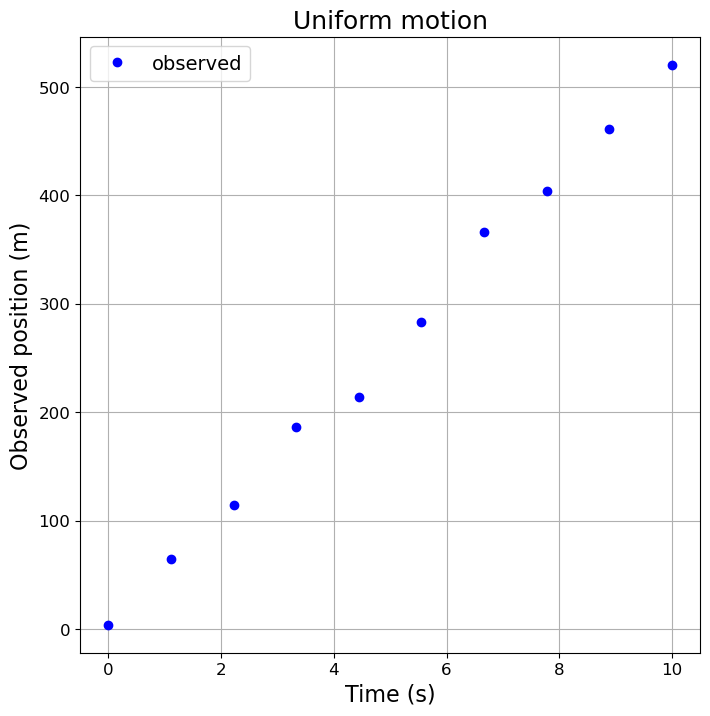

In [10]:
plt.figure(figsize=(8,8))
plt.title('Uniform motion', fontsize=18)
plt.plot(t, S_obs, 'bo', label = 'observed')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Observed position (m)', fontsize = 16)
plt.grid()


plt.show()

## Resolvendo o problema inverso

### Matriz de sensibilidade

In [11]:
G = np.empty((t.size,p_true.size))

In [12]:
G[:,0] = np.ones_like(t)
G[:,1] = t

In [19]:
G

array([[ 1.        ,  0.        ],
       [ 1.        ,  1.11111111],
       [ 1.        ,  2.22222222],
       [ 1.        ,  3.33333333],
       [ 1.        ,  4.44444444],
       [ 1.        ,  5.55555556],
       [ 1.        ,  6.66666667],
       [ 1.        ,  7.77777778],
       [ 1.        ,  8.88888889],
       [ 1.        , 10.        ]])

## Resolvendo o Sistema linear utilizando a norma-L2

In [14]:
def L2_norm(A,d):
    At = A.T
    AtA = np.dot(At,A)
    Atd = np.dot(At,d)
    m = np.linalg.solve(AtA,Atd)
    return m 

In [15]:
p_est = L2_norm(G,S_obs)

In [16]:
S_pred = np.dot(G,p_est)

## Visualizando o resultado

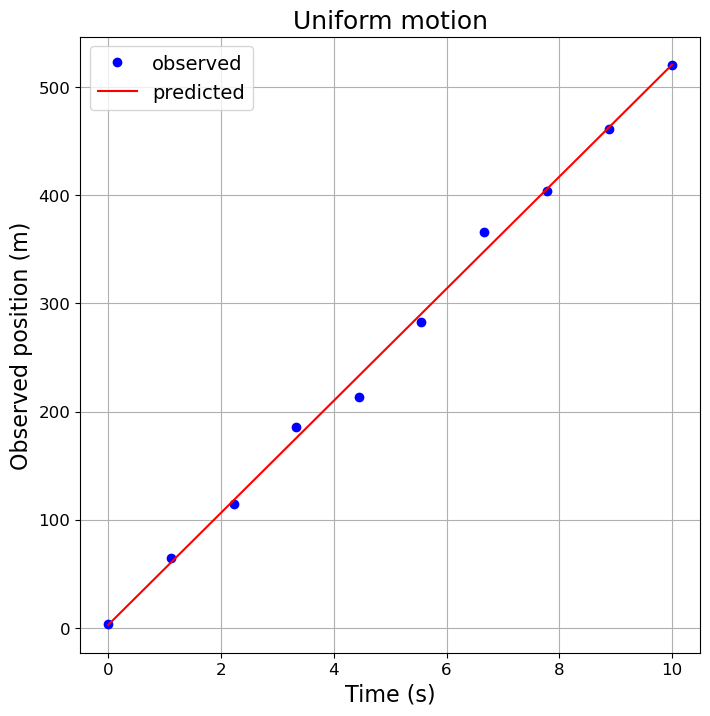

In [17]:
plt.figure(figsize=(8,8))
plt.title('Uniform motion', fontsize=18)
plt.plot(t, S_obs, 'bo', label = 'observed')
plt.plot(t, S_pred, 'r-', label = 'predicted')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Observed position (m)', fontsize = 16)
plt.grid()
plt.show()

### Comparação entre estimado e verdadeiro

In [18]:
print (p_true)
print (p_est)

[10. 50.]
[ 2.97565795 51.75409294]
